In [ ]:
!wget -c https://repo.continuum.io/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
!chmod +x Miniconda3-py37_4.8.3-Linux-x86_64.sh
!time bash ./Miniconda3-py37_4.8.3-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c rdkit rdkit

import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-04-22 11:43:34--  https://repo.continuum.io/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh [following]
--2022-04-22 11:43:34--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88867207 (85M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.3-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  84.75M   110MB/s    in 0.8s    

2022-04-22 11:43:35 (110 MB/s) - ‘Minicon

# Coulomb Matrix

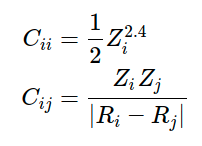


$Z_i$ is the nuclear charge of atom i and $R_i$ is its position. The Coulomb matrix has built-in invariance to translation and rotation of the molecule. 

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_absolute_error
from scipy.io import loadmat
from tqdm.auto import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
!pip install molml

     |████████████████████████████████| 49 kB 3.0 MB/s 
     |████████████████████████████████| 81 kB 5.8 MB/s 
     |████████████████████████████████| 829 kB 46.0 MB/s 
     |████████████████████████████████| 112 kB 39.2 MB/s 
     |████████████████████████████████| 86 kB 5.4 MB/s 
     |████████████████████████████████| 65 kB 3.7 MB/s 
  Created wheel for molml: filename=molml-0.9.0-py3-none-any.whl size=48033 sha256=a76784f49540e4f5d32e39d5257df43c25c08bcfdaf6ed8dfb12cc22d7f65c3a
  Stored in directory: /root/.cache/pip/wheels/fd/e0/af/d7f31c593ca14b103e3e201575a81773dd264f09f0bd402d9a
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491058 sha256=a2e96051c560410de6152ba19e85f7527f91acae8c45f648d022c08ca7e6519b
  Stored in directory: /root/.cache/pip/wheels/56/b0/fe/4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
Successfully built molml future


In [ ]:
import molml
from molml.features import BagOfBonds
import csv
import numpy as np
import sklearn
import math
import random
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression
from scipy.io import loadmat
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import numpy as np
import pandas as pd
from tqdm.auto import tqdm

from matplotlib import pyplot as plt
import seaborn as sns

import rdkit, rdkit.Chem.AllChem, rdkit.Chem.Crippen
import rdkit.Chem as Chem
from rdkit.Chem import Draw

import torch
import sklearn.linear_model, sklearn.model_selection

In [ ]:
!unzip qm7.mat.zip

Archive:  qm7.mat.zip
  inflating: qm7.mat                 


In [ ]:
raw_data = loadmat("./qm7.mat")

In [ ]:
plt.style.use("ggplot")

In [ ]:
def coulomb_matrix_experiment(kernel="rbf"):
  trainVsMae = []
  for train_size in range(1000, 6000, 500): #iterating through different train sizes
    if train_size > 5732: train_size = 5732
    mae = np.array([])
      
    for validation_no in tqdm(range(5), desc="Running cross validation for size {} \n".format(train_size)): #different crossvalidation
          
        #Randomly making test and train data indices
        
        test_data_indices = raw_data['P'][validation_no].flatten()
        train_data_indices = np.array(list(set(raw_data['P'].flatten()) - set(test_data_indices)))[:train_size]
        
        train_data_X = raw_data['X'][train_data_indices]
        train_data_Y = raw_data['T'][0][train_data_indices]
        
        test_data_X = raw_data['X'][test_data_indices].reshape(1433,23*23)
        test_data_Y = raw_data['T'][0,test_data_indices]
        
        train_X_reshaped = train_data_X.reshape(len(train_data_X),23*23)
        if kernel=="rbf":
          reg_mod = KernelRidge(alpha = 1e-3, kernel = "rbf", gamma=0.0001389)
        else:
          reg_mod = KernelRidge(alpha = 1e-8, kernel = "laplacian", gamma=1/4000)
        train_X_reshaped = train_X_reshaped.astype(np.float32)
        train_data_Y = train_data_Y.astype(np.float32)
        reg_mod.fit(train_X_reshaped, train_data_Y)
        predictions = reg_mod.predict(test_data_X)
        mae = np.append(mae, mean_absolute_error(test_data_Y, predictions))
        # print(" Train Size : {:n} , valid: {:n}  MAE: {:f}".format(train_size, validation_no, mae[-1]))
    trainVsMae = np.append(trainVsMae, np.average(mae))
    print("Net mae for train_size : {:n} = {:f}".format(train_size, trainVsMae[-1]))
  fig = sns.pointplot(np.arange(1000, 6000, 500), trainVsMae, markers="x")
  plt.xlabel("Training Size")
  plt.ylabel("MAE")
  plt.title("Error vs Training size for kernel: {}".format(kernel))
  plt.show()
  return trainVsMae

Running cross validation for size 1000 
:   0%|          | 0/5 [00:00<?, ?it/s]

Net mae for train_size : 1000 = 15.272065


Running cross validation for size 1500 
:   0%|          | 0/5 [00:00<?, ?it/s]

Net mae for train_size : 1500 = 10.241929


Running cross validation for size 2000 
:   0%|          | 0/5 [00:00<?, ?it/s]

Net mae for train_size : 2000 = 9.706517


Running cross validation for size 2500 
:   0%|          | 0/5 [00:00<?, ?it/s]

Net mae for train_size : 2500 = 9.347797


Running cross validation for size 3000 
:   0%|          | 0/5 [00:00<?, ?it/s]

Net mae for train_size : 3000 = 9.060673


Running cross validation for size 3500 
:   0%|          | 0/5 [00:00<?, ?it/s]

Net mae for train_size : 3500 = 7.318409


Running cross validation for size 4000 
:   0%|          | 0/5 [00:00<?, ?it/s]

Net mae for train_size : 4000 = 6.659309


Running cross validation for size 4500 
:   0%|          | 0/5 [00:00<?, ?it/s]

Net mae for train_size : 4500 = 6.306897


Running cross validation for size 5000 
:   0%|          | 0/5 [00:00<?, ?it/s]

Net mae for train_size : 5000 = 5.944993


Running cross validation for size 5500 
:   0%|          | 0/5 [00:00<?, ?it/s]

Net mae for train_size : 5500 = 4.413044


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


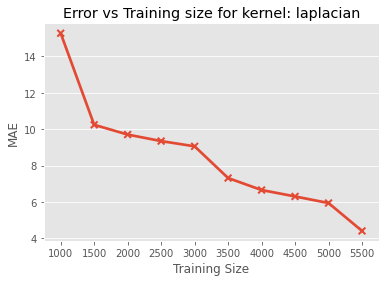

In [ ]:
errors = coulomb_matrix_experiment(kernel="laplacian")

Running cross validation for size 1000 
:   0%|          | 0/5 [00:00<?, ?it/s]

Net mae for train_size : 1000 = 87.758682


Running cross validation for size 1500 
:   0%|          | 0/5 [00:00<?, ?it/s]

Net mae for train_size : 1500 = 77.510188


Running cross validation for size 2000 
:   0%|          | 0/5 [00:00<?, ?it/s]

Net mae for train_size : 2000 = 35.085959


Running cross validation for size 2500 
:   0%|          | 0/5 [00:00<?, ?it/s]

Net mae for train_size : 2500 = 33.755584


Running cross validation for size 3000 
:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=5.59916e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=5.11755e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=5.44545e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=5.71472e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning

Net mae for train_size : 3000 = 33.005355


Running cross validation for size 3500 
:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=4.65657e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=4.05541e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=5.29478e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=4.99111e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning

Net mae for train_size : 3500 = 30.107062


Running cross validation for size 4000 
:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=3.73815e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=3.34173e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=3.34002e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=3.37887e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning

Net mae for train_size : 4000 = 28.677116


Running cross validation for size 4500 
:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=2.94368e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=3.09365e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=2.73527e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=2.69776e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning

Net mae for train_size : 4500 = 27.878884


Running cross validation for size 5000 
:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=2.23809e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=2.67569e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=2.27433e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=2.26349e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning

Net mae for train_size : 5000 = 27.218830


Running cross validation for size 5500 
:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=2.05297e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=2.11047e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=2.09167e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=2.07151e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning

Net mae for train_size : 5500 = 9.112677


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


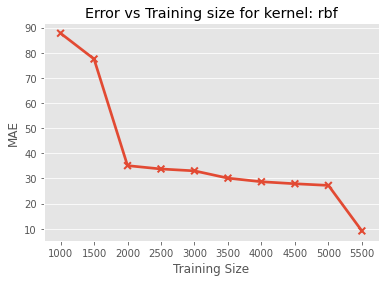

In [ ]:
errors = coulomb_matrix_experiment(kernel="rbf")

# Bag Of Bonds

 [Reference](https://https://pubs.acs.org/doi/pdf/10.1021/acs.jpclett.5b00831)

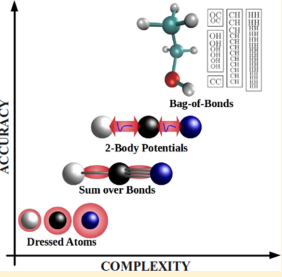

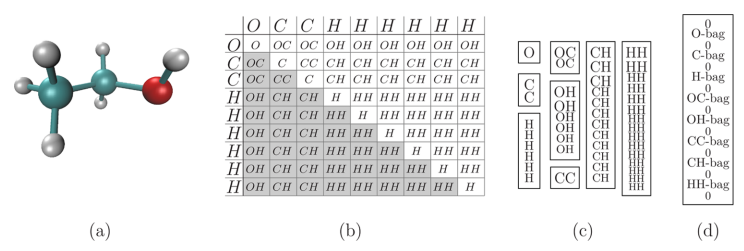 


#### Generating the Bag Of Bonds

In [ ]:
# Reading the file and get the BagOfBonds for each molecule which will then be used to predict atomisation energy

molecules=[]
for i in range(7165):
    molecules.append([[],[]])
energy=[]
f=open("dsgdb7ae.xyz","r")
k=0
while True:
    atom_num=f.readline()
    energy.append(float(f.readline()))
    
    for i in range(int(atom_num)):
        tmp=(f.readline().split("         "))
        coord=tmp[1].split("       ")
        molecules[k][0].append(tmp[0])
        molecules[k][1].append([float(coord[0]),float(coord[1]),float(coord[2])])
    k+=1
    if(k==7165):
        break
    f.readline()

In [ ]:
# molecules is a list of all the molecules in the dataset
# Each molecule consists of 2 lists, first list consists of atoms present in the molecule, 
# Second list consists of coordinates corresponding to the atoms
molecules[0],energy[0] 

([['C', 'H', 'H', 'H', 'H'],
  [[0.99826, -0.00246, -0.00436],
   [2.09021, -0.00243, 0.00414],
   [0.63379, 1.02686, 0.00414],
   [0.62704, -0.52773, 0.87811],
   [0.64136, -0.50747, -0.9054]]],
 -417.96)

In [ ]:
# generating the BagOfBonds using molml 
feat = BagOfBonds(add_atoms=True)

feat.fit(molecules)

bagsofbonds=feat.transform(molecules)
print(bagsofbonds)

[[36.8581052  0.         0.        ...  0.         0.         0.       ]
 [36.8581052 36.8581052  0.        ...  0.         0.         0.       ]
 [36.8581052 36.8581052  0.        ...  0.         0.         0.       ]
 ...
 [36.8581052 36.8581052 36.8581052 ...  0.         0.         0.       ]
 [36.8581052 36.8581052 36.8581052 ...  0.         0.         0.       ]
 [36.8581052 36.8581052 36.8581052 ...  0.         0.         0.       ]]


####function of bag of bonds just for reference


In [ ]:
def bagofbonds(molecules):
    bond_nums={}
    bond_types=[]
    size_of_bag=0
    bags=[]
    nuclear_charges={'C':6,'N':7,'O':8,'S':16,'H':1}
    for mol in molecules:
        mol_bond_nums={}
        mol_bond_types=[]

        for i in range(len(mol[0])):
            for j in range(len(mol[0])):
               
                if i != j:
                    
                    if str(mol[0][i]+mol[0][j]) not in mol_bond_types:
                        if str(mol[0][j]+mol[0][i]) not in mol_bond_types:
                            mol_bond_types.append(str(mol[0][i]+mol[0][j]))
                            mol_bond_nums[str(mol[0][i]+mol[0][j])] = 1
                        else:
                            mol_bond_nums[str(mol[0][j]+mol[0][i])] += 1
                            
                    else:
                        mol_bond_nums[str(mol[0][i]+mol[0][j])] +=1
                else:
                    
                    if str(mol[0][i]) not in mol_bond_types:
                        mol_bond_types.append(str(mol[0][i]))
                        mol_bond_nums[str(mol[0][i])] = 1
                    else:
                        mol_bond_nums[str(mol[0][i])] +=1

        for bond in mol_bond_types:
            if bond not in bond_types:
                if bond[::-1] in bond_types:
                    if bond_nums[bond[::-1]] < mol_bond_nums[bond]:
                        bond_nums[bond[::-1]] = mol_bond_nums[bond]
                else:
                    bond_types.append(bond)
                    bond_nums[bond]=mol_bond_nums[bond]
            else:
                if bond_nums[bond] < mol_bond_nums[bond]:
                    bond_nums[bond] = mol_bond_nums[bond]
    for i in bond_nums:
        if len(i) == 2:
            bond_nums[i]/=2
        size_of_bag+=bond_nums[i]
        
    for mol in molecules:
        bag=[]
        coulomb_matrix={}
        for i in range(len(mol[0])):
            for j in range(i+1):
                if i == j:
                    if str(mol[0][i]) not in coulomb_matrix.keys():
                        coulomb_matrix[str(mol[0][i])]=[0.5*(nuclear_charges[str(mol[0][i])])**2.4]
                    else:
                        coulomb_matrix[str(mol[0][i])].append(0.5*(nuclear_charges[str(mol[0][i])])**2.4)
                else:
                    if str(mol[0][i]+mol[0][j]) in coulomb_matrix.keys():
                        coulomb_matrix[str(mol[0][i]+mol[0][j])].append(((nuclear_charges[str(mol[0][i])]*nuclear_charges[str(mol[0][j])])/abs(np.linalg.norm(np.array(mol[1][i])-np.array(mol[1][j]),ord=2))))
#                         print(abs(np.linalg.norm(np.array(mol[1][i])-np.array(mol[1][j]),ord=2)))
                    elif str(mol[0][j]+mol[0][i]) in coulomb_matrix.keys():
                        coulomb_matrix[str(mol[0][j]+mol[0][i])].append(((nuclear_charges[str(mol[0][i])]*nuclear_charges[str(mol[0][j])])/abs(np.linalg.norm(np.array(mol[1][i])-np.array(mol[1][j]),ord=2))))
#                         print(abs(np.linalg.norm(np.array(mol[1][i])-np.array(mol[1][j]),ord=2)))
                    else:
                        coulomb_matrix[str(mol[0][i]+mol[0][j])]=[((nuclear_charges[str(mol[0][i])]*nuclear_charges[str(mol[0][j])])/abs(np.linalg.norm(np.array(mol[1][i])-np.array(mol[1][j]),ord=2)))]
#                         print(abs(np.linalg.norm(np.array(mol[1][i])-np.array(mol[1][j]),ord=2)))
                                
        for bond in bond_nums:
            
            if bond in coulomb_matrix.keys():
            
                coulomb_matrix[bond].sort(reverse=True)
                
                for value in coulomb_matrix[bond]:
                    bag.append(value)
                
                for i in range(int(bond_nums[bond])-len(coulomb_matrix[bond])):
                    bag.append(0)
            
            elif bond[::-1] in coulomb_matrix.keys():
                
                coulomb_matrix[bond[::-1]].sort(reverse=True)
                
                for value in coulomb_matrix[bond[::-1]]:
                    bag.append(value)
                
                if bond[::-1] in bond_nums.keys():
                    for i in range(int(bond_nums[bond[::-1]])-len(coulomb_matrix[bond[::-1]])):
                        bag.append(0)
                elif bond in bond_nums.keys():
                    for i in range(int(bond_nums[bond])-len(coulomb_matrix[bond[::-1]])):
                        bag.append(0)
                else:
                    print("ERROR")

            else:
                
                for i in range(int(bond_nums[bond])):
                    bag.append(0)
        
#         print(coulomb_matrix,bond_nums)
#         if len(bag) != 386:
#         print("****")
#         print((bag))
        bags.append(bag)
    return bags

#### Using Kernel Regression to predict the atomisattion Energy

In [ ]:
# Train Test Split, cant use the train_test_split directly 
number=list(range(7165))
random.shuffle(number)
trainx=[]
trainy=[]
for i in number[0:int(0.8*len(number))]:
    trainx.append(bagsofbonds[i])
    trainy.append(energy[i])
testx=[]
testy=[]
for i in number[int(0.8*len(number)):]:
    testx.append(bagsofbonds[i])
    testy.append(energy[i])

In [ ]:
clf = KernelRidge(alpha=0,kernel='laplacian',gamma=1/(len(bagsofbonds[0])*3.5))
clf.fit(trainx, trainy)
pred=clf.predict(testx)

In [ ]:
print("RMSE for the Train Set",mean_squared_error(trainy, clf.predict(trainx),squared=False))
print("RMSE for the Test Set",mean_squared_error(testy, pred,squared=False))

RMSE for the Train Set 4.792060639777889e-11
RMSE for the Test Set 4.336926110898432


## Extended Connectivity Fingerprints

1. Compute a unique index for each atom. This is a long integer hash made using the following features (Daylight atomic invariants)

* Number of non-hydrogen immediate neighbors
* Valency minus the number of connected hydrogens (i.e., total bond order ignoring H)
* Atomic number
* Atomic mass
* Atomic charge
* Number of attached hydrogens (both implicit and explicit)

2. Aggregate information from neighboring atoms and bonds connecting to them and use it to compute new feature vector.

    `[bond-order-1, atom-1-hash, bond-order-1, atom-2-hash, ...]`

    We hash this list to generate the 1-st iteration features for the atoms. These features in the 1-st iteration grab information from radius 1, diameter 2. We repeat this proecss, the 2-nd iteration vector will have information from radius 2, diameter 4.

    We do this for 2-3 iterations, leading to the different ECFP types, **ECFP-4, ECFP-6**, etc., depending on the diameter of data aggregation. 
    
    We also keep track of which bonds and atoms are getting aggregated in each iteration, and we de-duplicate the same neighborhood being added as a feature from two different starting points.

3. Given a target vector size, say 2048, take all the computed hashes over all iterations and find their values in this mod-field. i.e. `feature-id = hash-index % 2048`.

    Marks these feature ids in a 2048 length bit-vector, which now represents a hashed list of unique atom features, and substructure features upto small radii.

The following features are important to note about ECFP:
* The Hydrogen atoms are not a part of the fingerprinting process.
* ECFP depends on the hash function implementation of each programming language and therefore may differ in value from implementation to implementation.
* ECFP-4 is sufficient for most clustering or similarity indexing tasks.
* ECFP-6 or ECFP-8 might be needed for activity prediction tasks.


Refer to https://chemicbook.com/2021/03/25/a-beginners-guide-for-understanding-extended-connectivity-fingerprints.html for a detailed explainiation.

In [ ]:
molecule = "C1CCCC1"

fingerprint = np.asarray(
    rdkit.Chem.AllChem.GetMorganFingerprintAsBitVect(
        rdkit.Chem.MolFromSmiles(molecule),
        radius=3,
        nBits=32
    )
)

print("Morgan Fingerprint of Benzene", fingerprint)

Morgan Fingerprint of Benzene [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0]


Morgan fingerprint is a type of ECFP.

## Molecule Similarity

$$\text{Travsky}_{a,b}(V_i, V_j) = \frac{V_i \cdot V_j}{a ||V_i||_1 + b ||V_j||_1 + (1 - a- b) V_i \cdot V_j}$$

Travsky similarity is the general framework in which all other fingerprint similarity measures fit.

$$\text{Tanimoto}(V_i, V_j) = \text{Travsky}_{1,1}(V_i, V_j)$$

Tanimoto similarity is the ratio of the number of molecular features present in both molecules (intersection) over the number of molecular features present in either molecule (union).

$$\text{Tanimoto}(V_i, V_j) = \frac{V_i \cdot V_j}{||V_i||_1 + ||V_j||_1 - V_i \cdot V_j}$$

$$\text{Dice}(V_i, V_j) = \text{Travsky}_{0.5,0.5}(V_i, V_j)$$

Tanimoto similarity is the ratio of the number of molecular features present in both molecules (intersection) over the average number of molecular features present in both the molecules (mean of L1 norm).

$$\text{Dice}(V_i, V_j) = \frac{V_i \cdot V_j}{\frac{1}{2} ||V_i||_1 + \frac{1}{2} ||V_j||_1}$$

In [ ]:
def generate_molecule_data(batch_size=128):
    smiles, data = [], []
    with open("gdb11_size08.smi", "r") as f:
        for dataline in tqdm.tqdm(list(f.readlines())):
            smile = dataline.split()[0]
            molecule = rdkit.Chem.MolFromSmiles(smile)
            fingerprint = rdkit.Chem.RDKFingerprint(molecule)
            data.append(fingerprint)
            smiles.append(smile)
    return data, smiles

## Making a Vocabulary Using a Smiles Database and using a simple RNN to predict solvation energy 


In [ ]:
import torch
from torch import nn
import numpy as np
import torch.optim as optim
from tqdm.auto import tqdm
import re
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [ ]:
df = pd.read_csv('./esol.csv')
df = df[['measured log solubility in mols per litre','smiles']]
train_df, validate_df, test_df = np.split(df.sample(frac=1), [int(.8*len(df)), int(.9*len(df))])

In [ ]:
elements = {'Br', 'C', 'Cl', 'F', 'I', 'N', 'O', 'P', 'S','H','Si'}
vocab = set()
for indx,val in enumerate(list(df['smiles'].values)):
    temp_smile = re.sub(' ','',val)   ##remove spaces from the smile string
    for element in elements:
        search_obj = re.search(element,temp_smile)
        if search_obj:
            temp_smile = re.sub(element,'',temp_smile)
            vocab.add(element)
        search_obj = re.search(element.lower(),temp_smile)
        if search_obj:
            temp_smile = re.sub(element.lower(),'',temp_smile)
            vocab.add(element.lower())
    
    for i in temp_smile:
        vocab.add(i)
## convert vocab from set to list for indexing
vocab = list(vocab)

In [ ]:
vocab

['F',
 '=',
 'Cl',
 '3',
 'C',
 'I',
 '\\',
 '#',
 '6',
 'P',
 '4',
 ']',
 '2',
 '1',
 'Br',
 '8',
 '(',
 ')',
 'n',
 'O',
 'c',
 '/',
 '5',
 's',
 '[',
 '7',
 'N',
 'o',
 'S',
 'H']

In [ ]:
def smiles2vec(smile):
    indx = 0
    vec = []
    smile = smile.strip()
    while indx < len(smile):
        if (indx is not len(smile) - 1) and (smile[indx] + smile[indx+1]) in vocab:
            vec.append(vocab.index(smile[indx] + smile[indx+1]))
            indx += 2
            
        elif (smile[indx]) in vocab:
            vec.append(vocab.index(smile[indx]))
            indx += 1
            
    return vec

In [ ]:
smiles2vec("C1CCCCCONC1")

[4, 13, 4, 4, 4, 4, 4, 19, 26, 4, 13]

In [ ]:
INPUT_SIZE = 1      # rnn input size
HIDDEN_SIZE = 120      # rnn hidden size
LR = 1e-2         # learning rate
BATCH_SIZE = 32

In [ ]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()

        self.rnn = nn.RNN(
            input_size=INPUT_SIZE,
            hidden_size=HIDDEN_SIZE,     # rnn hidden unit
            num_layers=1,                # number of rnn layer
            batch_first = True,
        )
        self.out = nn.Linear(HIDDEN_SIZE, 60)
        self.final = nn.Linear(60, 1)

    def forward(self, x, time_step):
        h_state = torch.zeros(1,1,HIDDEN_SIZE).float()
        r_out, h_state = self.rnn(x.float(), h_state)
        r_out = torch.mean(r_out,dim=1)
        r_out = self.out(r_out)
        r_out = F.relu(r_out)
        prediction = self.final(r_out)
        return prediction

In [ ]:
model = Model()
optimizer = optim.Adam(model.parameters(), lr=LR)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',verbose=True,patience=5)

In [ ]:
def train(epoch,train_set):
    model.train()
    sample_index = 0
    epoch_train_loss=[]
    random_indexes=np.random.permutation(len(train_set))
    MAXITER = len(train_set)/BATCH_SIZE
    for batch_no in range(0,round(MAXITER)):
        optimizer.zero_grad()
        train_loss = torch.zeros(1, 1)
        
        for iter_no in range(0, BATCH_SIZE):
            sample_index = sample_index%len(train_set)
            index=random_indexes[sample_index]
            data = train_set[index]
    
            smile = data[1]
            smile_vec = smiles2vec(smile)
            smile_vec = torch.FloatTensor(smile_vec)
            smile_vec = smile_vec.unsqueeze(0)
            smile_vec = smile_vec.unsqueeze(2)
            y_hat = model(smile_vec,smile_vec.shape[1])
            
            y = torch.FloatTensor([data[0]])
            error = ((y_hat - y)**2 / BATCH_SIZE)
            train_loss = train_loss + error
            
            sample_index += 1

        epoch_train_loss.append(train_loss.item())
        train_loss.backward()
        optimizer.step()
    
    return np.mean(epoch_train_loss)

In [ ]:
def validation():
    model.eval()
    val_loss = torch.zeros(1, 1)
    for index,data in enumerate(validate_df.values):
        smile = data[1]
        smile_vec = smiles2vec(smile)
        smile_vec = torch.FloatTensor(smile_vec)
        smile_vec = smile_vec.unsqueeze(0)
        smile_vec = smile_vec.unsqueeze(2)
        y_hat = model(smile_vec,smile_vec.shape[1])

        y = torch.FloatTensor([data[0]])
        error = (y_hat - y)**2
        val_loss = val_loss + error

    return val_loss.item()/len(validate_df)

In [ ]:
train_loss_arr = []
validation_loss_arr = []
for epoch in tqdm(range(100)):
    train_loss = train(epoch,train_df.values)
    val_loss = validation()
    train_loss_arr.append(train_loss)
    validation_loss_arr.append(val_loss)
    print("epoch_no: ",epoch ,"training loss: ",train_loss,"validation loss: ",val_loss)
    scheduler.step(val_loss)

  0%|          | 0/100 [00:00<?, ?it/s]

epoch_no:  0 training loss:  5.648533752986363 validation loss:  4.311251479967505
epoch_no:  1 training loss:  4.226836587701525 validation loss:  4.218007585643667
epoch_no:  2 training loss:  3.8521051619734084 validation loss:  3.733962877661781
epoch_no:  3 training loss:  3.4035866984299252 validation loss:  3.239125479639104
epoch_no:  4 training loss:  3.001891702413559 validation loss:  3.056096709935011
epoch_no:  5 training loss:  3.0391777583530972 validation loss:  3.0724968024059733
epoch_no:  6 training loss:  2.990479256425585 validation loss:  3.144212030731471
epoch_no:  7 training loss:  2.8947771149022237 validation loss:  3.012013663232854
epoch_no:  8 training loss:  2.9967138980116164 validation loss:  3.4138513075566923
epoch_no:  9 training loss:  2.8310506833451137 validation loss:  3.5323721286469856
epoch_no:  10 training loss:  2.741199391228812 validation loss:  3.302017617014657
epoch_no:  11 training loss:  2.8008434985365187 validation loss:  3.36812895

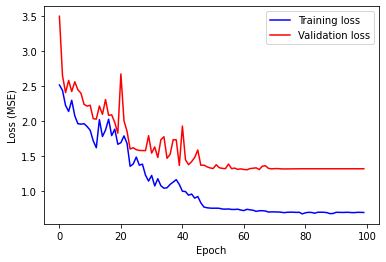

In [ ]:
plt.plot(train_loss_arr,'b',label='Training loss')
plt.plot(validation_loss_arr,'r',label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.plot()
plt.show()